In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy

import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import geopandas
import cartopy.io.shapereader as shpreader
import shapely
import re

from matplotlib.patches import Rectangle


# Load all the data

In [80]:
seen_df = pd.read_csv('../data/0_labelled_documents.csv')
cat_df = pd.read_csv('../data/1_predicted_category_documents.csv')
predictions = pd.read_csv('../data/1_document_relevance.csv')
df = cat_df.merge(cat_df.merge(predictions), how="outer")

# Merge actual and predicted categories
pred_cats = [c for c  in df.columns if "12 - " in c and " - mean_prediction" in c]
for c in pred_cats:
    print(df[c].sum())
    label = c.replace(" - mean_prediction",'')
    cs = [c, c.replace('mean_prediction','lower_pred'), c.replace('mean_prediction','upper_pred')]
    df.loc[df[label]==1,cs] = 1
    print(df[c].sum())
print(pred_cats)

pred_cats = [
    "12 - Terrestrial ES - mean_prediction",
    "12 - Coastal and marine Ecosystems - mean_prediction",
    "12 - Mountains, snow and ice - mean_prediction",
    "12 - Rivers, lakes, and soil moisture - mean_prediction",
    "12 - Human and managed - mean_prediction",
    "12 - Total"
]

# Merge actual and predicted specific categories

extra_cat_df = pd.read_csv('../data/1_predicted_category_documents_specific.csv')

specific_impact_cats = [x for x in extra_cat_df.columns if "18 -" in x and "mean" in x]

extra_cat_df = extra_cat_df[["id"]+[x for x in extra_cat_df.columns if "18 - " in x] ]

df = df.merge(extra_cat_df, how="outer")

print(df.shape)

import gspread
from oauth2client.service_account import ServiceAccountCredentials
scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name('../literature_identification/jupyter-google-e4b72bf44320.json', scope)
gc = gspread.authorize(credentials)
spreadsheet_key = '1o18FIQTmGSWJ_m1ePAzrcVhFlfesESCb2bIEG7ibJAA'
wb = gc.open_by_key(spreadsheet_key)
ws = wb.worksheet("category_label_numbers")
table = ws.get_all_values()
category_map = pd.DataFrame(table[1:], columns=table[0])

impact_columns = [x for x in df.columns if re.match("^4 - ",x)]
for x in impact_columns:
    row = category_map.loc[category_map['Specific category']==x.split(' - ')[1]]
    if row.shape[0]==0:
        continue
    for i, aggscheme in enumerate(row[['Proposed Aggregation 1', 'Proposed Aggregation 2']].values[0]):
        if aggscheme not in ['-','']:
            nc = f'{17+i} - {aggscheme}'
            if nc not in df.columns:
                df[nc] = 0
            df.loc[df[x]==1,nc] = 1

specific_impacts = [
    '18 - Terrestrial Water Cycle - mean_prediction',
    '18 - Drought & Floods - mean_prediction',
    '18 - Cryosphere - mean_prediction',
    '18 - Coastal and marine Ecosystems - mean_prediction',
    '18 - Terrestrial ES - mean_prediction',
    #'18 - Carbon Cycle - mean_prediction',
    '18 - Wildfires - mean_prediction',
    '18 - Food/Agriculture - mean_prediction',
    '18 - Livelihoods and wellbeing - mean_prediction',
    '18 - Health - mean_prediction',
    '18 - Displacement and migration - mean_prediction',
    #'18 - Other anthropogenic - mean_prediction'
]

for c in specific_impacts:
    print(df[c].sum())
    label = c.replace(" - mean_prediction",'')
    cs = [c, c.replace('mean_prediction','lower_pred'), c.replace('mean_prediction','upper_pred')]
    df.loc[df[label]==1,cs] = 1
    print(df[c].sum())

# Merge actual and predicted relevance
pcols = [
    '0 - relevance - mean_prediction',
    '0 - relevance - lower_pred',
    '0 - relevance - upper_pred'
]

df.loc[df['relevant']==1,pcols]=1

df.head()

12291.1
12464.1
10176.9
10457.9
4585.8
4744.8
11683.5
11976.5
29838.399999999998
30281.399999999998
['12 - Coastal and marine Ecosystems - mean_prediction', '12 - Human and managed - mean_prediction', '12 - Mountains, snow and ice - mean_prediction', '12 - Rivers, lakes, and soil moisture - mean_prediction', '12 - Terrestrial ES - mean_prediction']
(97122, 284)
10537.036681432624
10683.036681432624
6160.793234897791
6222.793234897791
4449.103043613481
4522.103043613481
8148.634285719894
8217.634285719894
27910.94760679921
28185.94760679921
1312.8691462897752
1342.8691462897752
3198.492303500201
3251.492303500201
3619.816621039322
3668.5669752009553
4381.209047054287
4506.209047054287
1201.1529353857718
1232.2761132378346


,Unnamed: 0,id,content,title,wosarticle__de,wosarticle__wc,ar5,seen,relevant,random_sample,...,17 - Ecosystem productivity and carbon cycle (CMES),17 - Distribution and range shifts (TES),17 - Phenology (TES),"17 - Physiology, metabolism, mortality and growth (TES)",17 - Community composition and interaction (TES),17 - Ecosystem productivity and carbon cycle (TES),17 - Wildfires,17 - Livelihoods and wellbeing,17 - Health,17 - Displacement and migration
0,0,1298506,"In this study, we evaluated the effects of CO2...",Effects of seawater acidification on the early...,seawater acidification; Glyptocidaris crenular...,['Limnology; Oceanography'],NaN,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1294278,"Mean air temperatures and the frequency, inten...",Nest box design for a changing climate: The va...,artificial hollows; climate change; hollow-nes...,['Ecology'],NaN,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1522976,Surging glaciers are potential analogues for l...,Glacial geological studies of surge-type glaci...,Surge-type glacier; Iceland; Landsystem model;...,"['Geosciences, Multidisciplinary']",NaN,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,11008,Deposits of the Last Interglacial on the south...,THE LAST INTERGLACIAL IN THE MEDITERRANEAN AS ...,NaN,"['Geography, Physical; Geosciences, Multidisci...",NaN,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,772888,Identifying patterns in the effects of tempera...,Cross-taxa generalities in the relationship be...,climate change; population size; time series; ...,['Biology; Ecology; Evolutionary Biology'],NaN,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
doc_continents = pd.read_csv('../data/doc_continents.csv')
doc_continents.head()

,doc_id,continent
0,1340101,NaN
1,222401,North America
2,3307272,North America
3,355004,North America
4,4603,North America


,continent,impact,n
0,North America,Terrestrial Water Cycle,2719
1,North America,Drought & Floods,1062
2,North America,Cryosphere,1075
3,North America,Coastal and marine Ecosystems,1956
4,North America,Terrestrial ES,8625


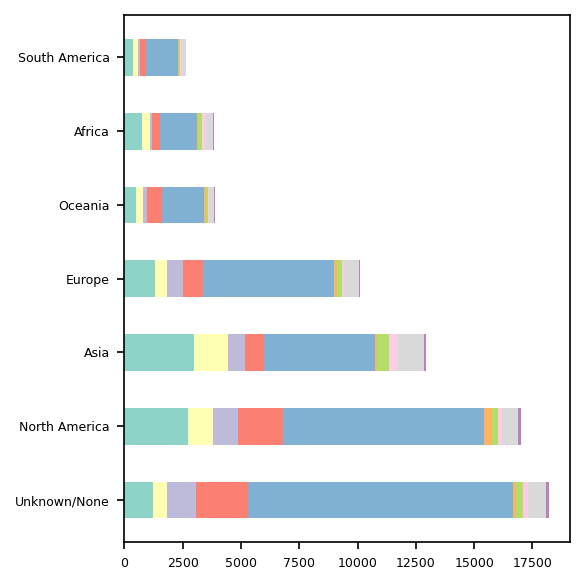

In [37]:
fig, ax = plt.subplots(figsize=(4,4), dpi=150)

ticks = []

colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd']

data = []

continents = ["North America", "Asia", "Europe", "Oceania", "Africa", "South America"]
for h, continent in enumerate(continents):
    cgroup = doc_continents[doc_continents['continent']==continent]
    df_continent = df[df['id'].isin(cgroup['doc_id'])]
    left=0

    for j, c in enumerate(specific_impacts):
        mid = df_continent[
            (df_continent['0 - relevance - mean_prediction']>0.5) & 
            (df_continent[c]>0.5)
        ].shape[0]
        if h==0:
            label=c.split(' - ')[1]
        else:
            label=None
        ax.barh(h, mid, left=left, label=label, color=colors[j],height=0.5)

        data.append({
            "continent": continent,
            "impact": c.split(' - ')[1],
            "n": mid
        })

        left+=mid
        
cids = doc_continents.loc[doc_continents['continent'].isin(continents),"doc_id"]
df_continent = df[~df['id'].isin(cids)]
left=0
continent="Unknown/None"
for j, c in enumerate(specific_impacts):
    mid = df_continent[
        (df_continent['0 - relevance - mean_prediction']>0.5) & 
        (df_continent[c]>0.5)
    ].shape[0]
    if h==0:
        label=c.split(' - ')[1]
    else:
        label=None
    ax.barh(-1, mid, left=left, label=label, color=colors[j],height=0.5)

    data.append({
        "continent": continent,
        "impact": c.split(' - ')[1],
        "n": mid
    })

    left+=mid


ax.set_yticks(np.arange(-1,len(continents)))
ax.set_yticklabels(["Unknown/None"]+continents)
ax.tick_params(axis='both', labelsize=6) 

fig.tight_layout()

sum_df = pd.DataFrame.from_dict(data)
sum_df.head()

In [30]:
data = []
for continent in continents:
    cids = doc_continents.loc[doc_continents['continent']==continent,"doc_id"]
    sub_df = df[df['id'].isin(cids)]
    data.append({
        "continent": continent,
        "mid": sub_df[sub_df['0 - relevance - mean_prediction']>=0.5].shape[0],
        "ub":  sub_df[sub_df['0 - relevance - lower_pred']>=0.5].shape[0],
        "lb":  sub_df[sub_df['0 - relevance - upper_pred']>=0.5].shape[0],
    })
cids = doc_continents.loc[doc_continents['continent'].isin(continents),"doc_id"]
sub_df = df[~df['id'].isin(cids)]
data.append({
    "continent": "Unknown/None",
    "mid": sub_df[sub_df['0 - relevance - mean_prediction']>=0.5].shape[0],
    "ub":  sub_df[sub_df['0 - relevance - lower_pred']>=0.5].shape[0],
    "lb":  sub_df[sub_df['0 - relevance - upper_pred']>=0.5].shape[0],
})

continent_summary = pd.DataFrame.from_dict(data)
continent_summary.head(10)

,continent,mid,ub,lb
0,North America,23650,19715,27486
1,Asia,18824,16007,21684
2,Europe,13456,11128,15795
3,Oceania,5918,4925,6933
4,Africa,5568,4531,6569
5,South America,3747,3094,4329
6,Unknown/None,23951,19612,28401


In [39]:
sum_df['continent_prop'] = sum_df['n'] / sum_df.groupby(['continent'])['n'].transform('sum')

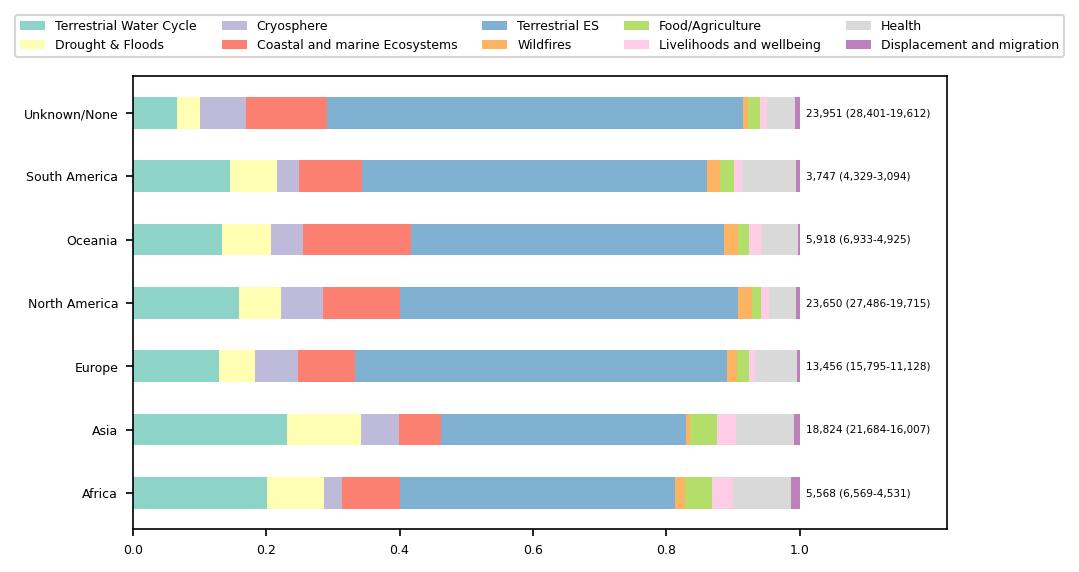

In [65]:
fig, ax = plt.subplots(figsize=(7,4), dpi=150)

ticks = []

for h, (continent, df_continent) in enumerate(sum_df.groupby('continent')):
    ticks.append(continent)
    left=0

    for j, c in enumerate(specific_impacts):

        mid = df_continent[df_continent['impact']==c.split(' - ')[1]].continent_prop.values[0]
        if h==0:
            label=c.split(' - ')[1]
        else:
            label=None
        ax.barh(h, mid, left=left, label=label, color=colors[j],height=0.5)
        left+=mid
        
    row = continent_summary[continent_summary['continent']==continent]
    label = f"{row.mid.values[0]:,} ({row.lb.values[0]:,}-{row.ub.values[0]:,})"
    ax.text(1.01, h, label, fontsize=5, va="center")

        
ax.set_xlim(xmax=1.22)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1])
            
ax.legend(fontsize=6, bbox_to_anchor=(0.5,1.15), ncol=5, loc="upper center")
ax.set_yticks(np.arange(len(ticks)))
ax.set_yticklabels(ticks)
ax.tick_params(axis='both', labelsize=6) 

Text(0, 0.5, 'Number of documents')

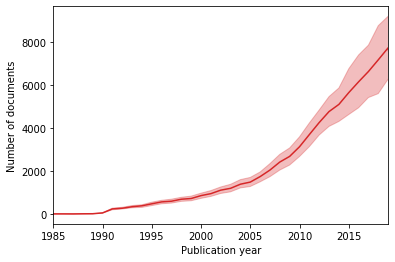

In [74]:
fig, ax = plt.subplots()

lb = df[df['0 - relevance - lower_pred']>0.5].groupby('PY')['id'].size().to_frame().reset_index().rename(columns={"id":"lb"})
mid = df[df['0 - relevance - mean_prediction']>0.5].groupby('PY')['id'].size().to_frame().reset_index()
ub = df[df['0 - relevance - upper_pred']>0.5].groupby('PY')['id'].size().to_frame().reset_index().rename(columns={"id":"ub"})

bounds = lb.merge(ub, how="outer")

ax.plot(mid['PY'], mid['id'], color="C3")

ax.fill_between(
    bounds['PY'], bounds['lb'], bounds['ub'],
    color="C3",
    alpha=0.3
)

ax.set_xlim([1985,2019])

ax.set_xlabel('Publication year')
ax.set_ylabel('Number of documents')

0.5641895835477563
0.2504913414291659
0.04211377091309928
0.0167343156757274
(-0.079135002979485, 1.0791350029794848)


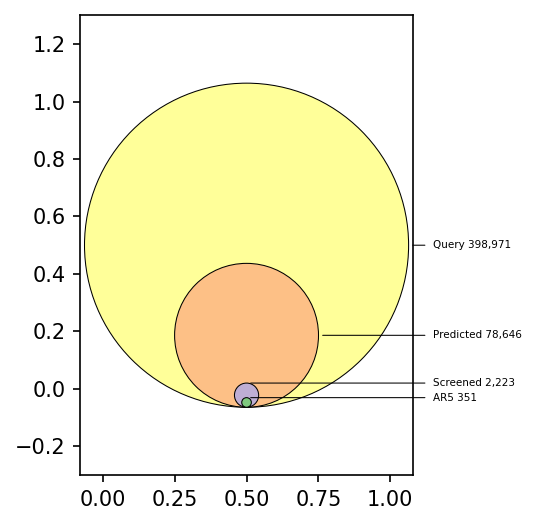

In [199]:
from matplotlib.patches import Circle
import math

fig, ax = plt.subplots(dpi=150, figsize=(3.6,3.6))

query_size = predictions.shape[0]
predicted_size = predictions[predictions['0 - relevance - mean_prediction']>0.5].shape[0]
screened_size = seen_df.shape[0]
ar5 = pd.read_csv('../literature_identification/IPCC_extraction.csv')
ar5_size = ar5.shape[0]

max_area = query_size

cols=["black","black","black","black"]
fill_cols = ['#7fc97f','#beaed4','#fdc086','#ffff99']
fill_cols.reverse()
lw = .5

def draw_circle(label, size, max_size, ax, col, max_r=None, ytop=False):
    r = math.sqrt(size/max_size/math.pi)
    print(r)
    if max_r is None:
        max_r = r
        y = 0.5
    else:
        y = 0.5-(max_r-r)
    circle = Circle(
        (0.5,y), r,
        color=col,
        ec="black",
        lw=lw,
        clip_on=False
    )
    ax.add_patch(circle)
    if ytop:
        ylab = y+r
        xlab = 0.5
    else:
        ylab = y
        xlab = 0.5+r
    if label:
        ax.annotate(
            f"{label} {size:,}", (xlab,ylab), (1.15,ylab), 
            arrowprops={"arrowstyle": "-",  "linewidth":0.5}, va="center",
            fontsize=5, annotation_clip=False
        )
    return r

#Query docs
max_r = draw_circle("Query", query_size, query_size, ax, fill_cols[0])
r = draw_circle("Predicted", predicted_size, query_size, ax, fill_cols[1], max_r)
r = draw_circle("Screened", screened_size, query_size, ax, fill_cols[2], max_r, True)
r = draw_circle("AR5", ar5_size, query_size, ax, fill_cols[3], max_r, True)

ax.axis('equal')
ax.margins(0)
#ax.axis('off')

fig.tight_layout()

print(ax.get_xlim())

plt.show()

In [102]:
attrib_cats = [c for c  in df.columns if "2 - " in c and " - mean_prediction" in c and not "12 - " in c]
for c in attrib_cats:
    print(df[c].sum())
    label = c.replace(" - mean_prediction",'')
    cs = [c, c.replace('mean_prediction','lower_pred'), c.replace('mean_prediction','upper_pred')]
    df.loc[df[label]==1,cs] = 1
    #df.loc[df[label]==1,c] = 1
    print(df[c].sum())
attrib_cats

42086.4
42534.4
34201.2
34539.2
4375.8
4472.8


['2 - Trend or climate change attribution - mean_prediction',
 '2 - 2.4. Sensitivity - mean_prediction',
 '2 - 2.5. Detection of a regional climate trend (no attribution) - mean_prediction']

[Text(0, 0, 'Trend attribution'),
 Text(0, 0, 'Sensitivity'),
 Text(0, 0, 'Detection')]

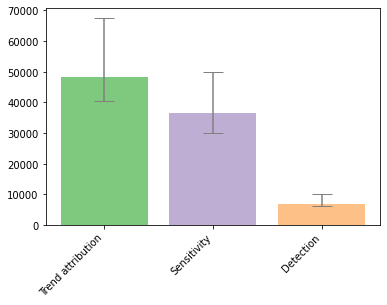

In [103]:
fig, ax = plt.subplots()
colors = ['#7fc97f','#beaed4','#fdc086']

xticks = []
for i, c in enumerate(attrib_cats):
    mid = df[
        (df['0 - relevance - mean_prediction']>0.5) & 
        (df[c])>0.5
    ].shape[0]
    ub = df[
        (df['0 - relevance - upper_pred']>0.5) & 
        (df[c.replace('mean_prediction','upper_pred')])>0.5
    ].shape[0]
    lb = df[
        (df['0 - relevance - lower_pred']>0.5) & 
        (df[c.replace('mean_prediction','lower_pred')])>0.5
    ].shape[0]
    ax.bar(i, mid,color=colors[i])
    
    eay = np.array([[ub-mid,mid-lb]]).T
    
    ax.errorbar(i, mid, yerr=eay, color="grey", capsize=10)
    
    xticks.append(c.split("-")[1].strip())
    
ax.set_xticks(range(i+1))

xticks = [
    "Trend attribution",
    "Sensitivity",
    "Detection"
]
ax.set_xticklabels(xticks, rotation=45,ha="right")

0.5641895835477563
0.2504913414291659
0.04211377091309928
0.0167343156757274


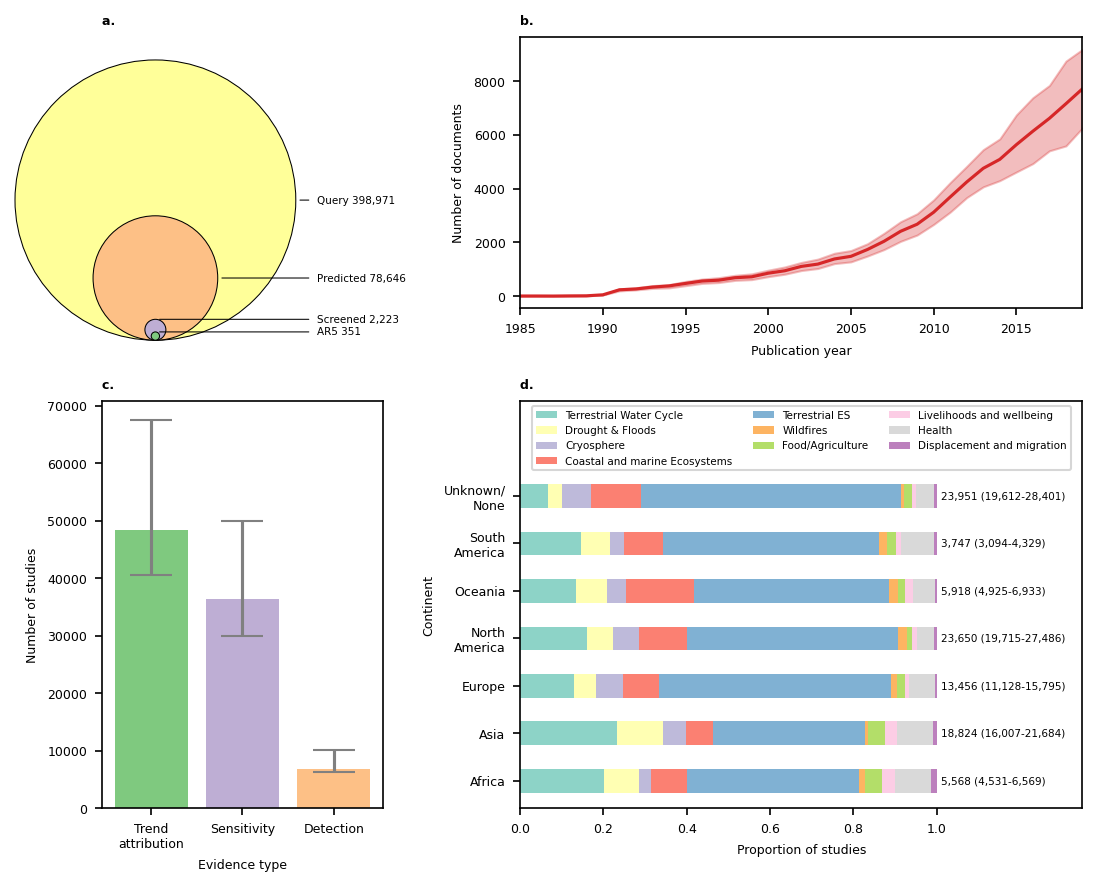

In [203]:
fig = plt.figure(figsize=(7.2,5.8), dpi=150, constrained_layout=True)
gs = fig.add_gridspec(2, 6, height_ratios=[1, 1.5])

ax = plt.subplot(gs[:1,0:2], frameon=False)
ax.set_title("a. ", fontsize=6, fontweight="bold", loc="left")
max_r = draw_circle("Query", query_size, query_size, ax, fill_cols[0])
r = draw_circle("Predicted", predicted_size, query_size, ax, fill_cols[1], max_r)
r = draw_circle("Screened", screened_size, query_size, ax, fill_cols[2], max_r, True)
r = draw_circle("AR5", ar5_size, query_size, ax, fill_cols[3], max_r, True)



ax.axis('equal')
ax.axis('off')
ax.set_xlim(xmin=0.4, xmax=1.3)
ax.set_ylim(ymin=0.1)

##################

ax = plt.subplot(gs[:1, 2:])
ax.set_title("b. ", fontsize=6, fontweight="bold", loc="left")
lb = df[df['0 - relevance - lower_pred']>0.5].groupby('PY')['id'].size().to_frame().reset_index().rename(columns={"id":"lb"})
mid = df[df['0 - relevance - mean_prediction']>0.5].groupby('PY')['id'].size().to_frame().reset_index()
ub = df[df['0 - relevance - upper_pred']>0.5].groupby('PY')['id'].size().to_frame().reset_index().rename(columns={"id":"ub"})

bounds = lb.merge(ub, how="outer")

ax.plot(mid['PY'], mid['id'], color="C3")

ax.fill_between(
    bounds['PY'], bounds['lb'], bounds['ub'],
    color="C3",
    alpha=0.3
)

ax.set_xlim([1985,2019])

ax.set_xlabel('Publication year', fontsize=6)
ax.set_ylabel('Number of documents', fontsize=6)
ax.tick_params(axis='both', labelsize=6) 

###########################################
#####


ax = plt.subplot(gs[1:, :2])
ax.set_title("c. ", fontsize=6, fontweight="bold", loc="left")

colors = ['#7fc97f','#beaed4','#fdc086']

xticks = []
for i, c in enumerate(attrib_cats):
    mid = df[
        (df['0 - relevance - mean_prediction']>0.5) & 
        (df[c])>0.5
    ].shape[0]
    ub = df[
        (df['0 - relevance - upper_pred']>0.5) & 
        (df[c.replace('mean_prediction','upper_pred')])>0.5
    ].shape[0]
    lb = df[
        (df['0 - relevance - lower_pred']>0.5) & 
        (df[c.replace('mean_prediction','lower_pred')])>0.5
    ].shape[0]
    ax.bar(i, mid,color=colors[i])
    
    eay = np.array([[ub-mid,mid-lb]]).T
    
    ax.errorbar(i, mid, yerr=eay, color="grey", capsize=10)
    
    xticks.append(c.split("-")[1].strip())
    
ax.set_xticks(range(i+1))

xticks = [
    "Trend\nattribution",
    "Sensitivity",
    "Detection"
]
ax.set_xticklabels(xticks, rotation=0,ha="center")
ax.tick_params(axis='both', labelsize=6) 
ax.set_xlabel('Evidence type', fontsize=6)
ax.set_ylabel('Number of studies', fontsize=6)


#####

ax = plt.subplot(gs[1:, 2:])

ticks = []

colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd']


for h, (continent, df_continent) in enumerate(sum_df.groupby('continent')):
    ticks.append(continent)
    left=0

    for j, c in enumerate(specific_impacts):

        mid = df_continent[df_continent['impact']==c.split(' - ')[1]].continent_prop.values[0]
        if h==0:
            label=c.split(' - ')[1]
        else:
            label=None
        ax.barh(h, mid, left=left, label=label, color=colors[j],height=0.5)
        left+=mid
        
    row = continent_summary[continent_summary['continent']==continent]
    label = f"{row.mid.values[0]:,} ({row.ub.values[0]:,}-{row.lb.values[0]:,})"
    ax.text(1.01, h, label, fontsize=5, va="center")

    
ax.set_xlim(xmax=1.35)
ax.set_ylim(ymax=h+2)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1])
            
ax.legend(fontsize=5, bbox_to_anchor=(0.5,1.0), ncol=3, loc="upper center", fancybox=True)
ax.set_yticks(np.arange(len(ticks)))
ax.set_yticklabels([x.replace('/','/\n').replace(' ','\n') for x in ticks])
ax.tick_params(axis='both', labelsize=6) 
ax.set_title("d. ", fontsize=6, fontweight="bold", loc="left")
ax.set_xlabel('Proportion of studies', fontsize=6)
ax.set_ylabel('Continent', fontsize=6)

plt.savefig('../figures/figure_1.pdf')
plt.show()